In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
def step_gradient(X, Y, learning_rate, m):    
    M = len(X)
    
    slopes_m = []
    for i in range(len(m)):
        m_i = (-2/M)*(((Y - ((m * X).sum(axis = 1))) * X[:, i]).sum())
        slopes_m.append(m_i)
    slopes_m = np.array(slopes_m)
    
    new_m = m - learning_rate * slopes_m
    
    return new_m

In [ ]:
def cost(X, Y, m):    
    M = len(X)
    
    cost = (((Y - ((m * X).sum(axis = 1)))**2).sum())/M
    return cost

In [ ]:
def gradient_descent(X, Y, learning_rate, num_iterations):
    m = np.zeros(len(X[0]))
    total_cost = []
    for i in range(num_iterations):
        m = step_gradient(X, Y, learning_rate, m)
        print(cost(X, Y, m))
        total_cost.append(cost(X, Y, m))
    plt.plot(np.array(total_cost))
    plt.show()
    return m

In [ ]:
def run():
    data = np.genfromtxt('training_boston_x_y_train.csv', delimiter = ',')
    X = data[:, :-1]
    temp = []
    for row in X:
        temp.append(row**2)
    temp = np.array(temp)
    X = np.append(X, temp, axis=1)
    Y = data[:, -1]
    
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    X = np.append(X, np.ones(len(X)).reshape(-1,1), axis = 1)
    
    learning_rate = 0.1
    num_iterations = 1000
    m = gradient_descent(X, Y, learning_rate, num_iterations)
    print(m)
    return m

375.8693265639223
242.51121799933722
160.5064664365577
109.24543265645516
76.87762541918471
56.299770022360896
43.14870760285192
34.704282014074046
29.25484902250858
25.716961065451258
23.40213864437938
21.871729426991283
20.845725277415916
20.14512332285747
19.655343226483446
19.302946116803945
19.04079179581997
18.8385639774165
18.67671683307785
18.542604900917826
18.428007585848796
18.327545000148096
18.237663763490566
18.155987391250235
18.08089997143911
18.011279157301885
17.946324755864293
17.88544853887734
17.82820327725989
17.77423691719261
17.723262882055327
17.67504072659247
17.629363444940505
17.58604906265632
17.544934993480243
17.5058741862689
17.468732436422304
17.43338645965748
17.39972246924158
17.367635089655593
17.337026498594916
17.307805727055943
17.279888071584665
17.253194588425107
17.22765164941022
17.203190545976234
17.1797471319289
17.157261498364747
17.13567767597629
17.114943361183776
17.09500966335355
17.07583087092298
17.05736423464388
17.03956976643745
17.

16.12093390586803
16.12085760525172
16.12078213499821
16.120707485977245
16.12063364916042
16.120560615620022
16.120488376527838
16.12041692315408
16.12034624686624
16.120276339127972
16.120207191498036
16.120138795629174
16.120071143267094
16.120004226249364
16.119938036504397
16.119872566050443
16.119807806994512
16.11974375153142
16.119680391942772
16.119617720595976
16.119555729943293
16.119494412520844
16.119433760947693
16.119373767924884
16.11931442623453
16.119255728738885
16.119197668379446
16.119140238176062
16.119083431226024
16.119027240703225
16.118971659857266
16.118916682012625
16.11886230056779
16.118808508994434
16.1187553008366
16.11870266970987
16.118650609300552
16.118599113364915
16.11854817572837
16.11849779028469
16.11844795099526
16.11839865188832
16.118349887058184
16.118301650664513
16.118253936931588
16.11820674014756
16.118160054663765
16.118113874893975
16.118068195313732
16.118023010459638
16.117978314928642
16.117934103377436
16.117890370521703
16.1178471

16.113899639090835
16.11389933222366
16.113899028619596
16.1138987282439
16.1138984310622
16.113898137040493
16.11389784614515
16.113897558342867
16.11389727360073
16.113896991886165
16.11389671316693
16.11389643741116
16.113896164587285
16.11389589466411
16.113895627610763


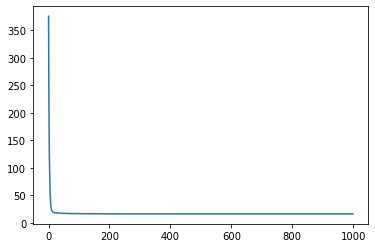

[-3.31410925 -0.84341169 -0.27579072  0.43430822 -3.19815444  1.49745255
  0.19313611 -3.78696322  4.06647198 -2.16942555 -1.46219288 -0.30577731
 -5.6122356   1.57357669  0.41933935  0.47712817  0.43430822 -0.05663525
  1.48574375  0.26964115  1.30419917 -0.2508101   0.05377671  0.91654243
 -0.81923008  1.83737355 22.60949868]


In [ ]:
m = run()

In [ ]:
data = np.genfromtxt('training_boston_x_y_train.csv', delimiter = ',')
X = data[:, :-1]
temp = []
for row in X:
    temp.append(row**2)
temp = np.array(temp)
X = np.append(X, temp, axis=1)
Y = data[:, -1]
    
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = np.append(X, np.ones(len(X)).reshape(-1,1), axis = 1)
preds = ((m * X).sum(axis = 1))

In [ ]:
#COD (R-squared)
u = ((Y - preds)**2).sum()
v = ((Y - Y.mean())**2).sum()
score = 1 - (u/v)
print('Score:', score)

Score: 0.8167476918056671


In [ ]:
RMSE = (((Y - preds)**2).mean())**0.5
print('RMSE: ', RMSE)

RMSE:  4.014211706874808


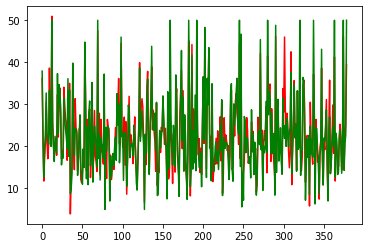

In [ ]:
plt.plot(preds, 'r')
plt.plot(Y, 'g')
plt.show()

In [ ]:
test_data = np.genfromtxt('test_boston_x_test.csv', delimiter = ',')

temp = []
for row in test_data:
    temp.append(row**2)
temp = np.array(temp)
test_data = np.append(test_data, temp, axis=1)

test_data = scaler.transform(test_data)
test_data = np.append(test_data, np.ones(len(test_data)).reshape(-1, 1), axis = 1)

preds = (m*test_data).sum(axis = 1)
for i in preds:
    print(i)
np.savetxt(X = preds, fname='submission.csv', delimiter=',', fmt='%.5f')

12.9757934126729
28.685764185237435
22.01388719173088
23.75786066003146
19.826328724660367
14.338176149639036
28.37748628464475
23.381545699019465
18.578710125514654
23.492546452381454
24.548539067496918
16.625085188093195
18.15542943050196
19.105172031860697
48.52495327574121
21.816289303358516
25.17014899380009
26.219198893937
17.153484677895577
31.2784219018734
20.98950847364813
23.970552276486913
35.53847398452697
35.403477879887205
33.556525694937285
17.6970826520198
23.33524507915556
32.030404487763725
22.905141144778334
32.91127083618159
15.584998878591827
26.298534740783026
22.093778535958926
23.17642304077469
11.896881347334618
28.801033404725956
25.125124772758284
19.765923165749555
22.536928468583273
9.370942593414021
16.240151820937598
26.839134161694364
30.635114875636727
19.324791804007788
17.618598622282363
12.834402370738486
47.20127933742218
23.005644722134768
31.891180960099504
13.779309359304838
15.316909408336908
41.94840776190269
14.49819007846747
19.73747048428085